difference tensor([ 0.0000e+00,  2.9104e-11,  1.1642e-10,  1.4552e-10,  1.3461e-10,
         7.2760e-11,  0.0000e+00, -5.8208e-11, -5.8208e-11,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1642e-10,
         1.7462e-10,  2.3283e-10,  1.7462e-10,  1.1642e-10, -1.1642e-10,
        -2.9104e-10, -2.3283e-10, -1.8917e-10,  0.0000e+00,  9.3132e-10,
         0.0000e+00,  1.8626e-09,  9.3132e-10,  6.9849e-10,  0.0000e+00,
         0.0000e+00, -1.8626e-09,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -1.8626e-09, -9.3132e-10, -9.3132e-10, -9.3132e-10,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -9.3132e-10,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  4.6566e-10,  1.8626e-09,  1.8626e-09,  1.8626e-09,
         9.3132e-10,  9.3132e-10,  9.3132e-10,  9.3132e-10,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.000

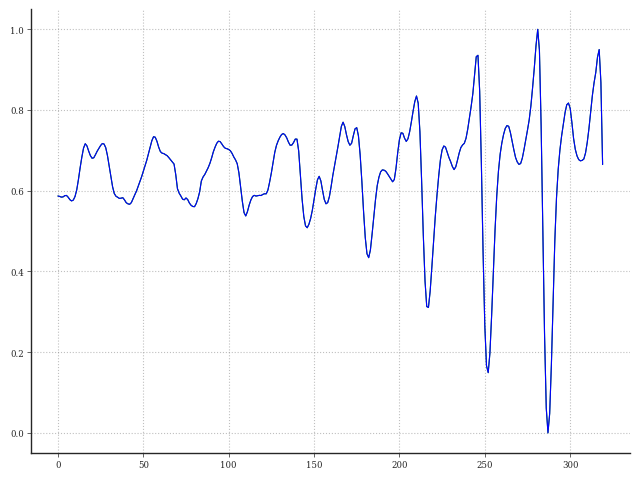

In [3]:
from LPCTorch.lpctorch.lpc import LPCCoefficients
import torch
import torchaudio
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy
from torch.nn import functional as F

from egaznepy.visualize import apply_plot_style

apply_plot_style()
plt.rcParams['text.usetex'] = False
# disable latex rendering matplotlib

x, sr = torchaudio.load(librosa.ex('trumpet'))
x_pad = F.pad(x,(0,160))
samples = x[-1]
win_len = 320
frames = x_pad.unfold(-1,320,160)
lpc = LPCCoefficients(order=16) 
lpcc = lpc(x)
coef= lpcc[-1,:,:]
residual = torch.empty_like(frames)
frame_rec = torch.empty_like(frames)
for frame in range(frames.size(1)):
    res = scipy.signal.lfilter(np.array(coef[frame,:]), np.array([1]), frames[:, frame])
    residual[:, frame,:] = torch.Tensor(res)
    frame_rec [:, frame,:]  = torch.Tensor(scipy.signal.lfilter(np.array([1]),coef[frame,:],residual[:, frame,:]))
dif = frames - frame_rec 
print("difference",dif[0,0,:])
frame_index = 1  
frames_np = frames[0, frame_index].numpy()
residual_np = residual[0, frame_index,:].numpy()
recons_frame = frame_rec[0, frame_index,:]

# Normalize 
frames_np_norm = (frames_np - frames_np.min()) / (frames_np.max() - frames_np.min())
residual_np_norm = (residual_np - residual_np.min()) / (residual_np.max() - residual_np.min())
reconstructed_np_norm = (recons_frame - recons_frame.min()) / (recons_frame.max() - recons_frame.min())

print("residual",frames_np_norm[0:10])
print("reconstructed",reconstructed_np_norm[0:10])

# plt.figure(figsize=(12, 6))
# plt.subplot(3, 1, 1)
# plt.plot(frames_np_norm)  
# plt.title('Original Frame')


# plt.subplot(3, 1, 2)
# plt.plot(residual_np_norm)  
# plt.title('Residual')


# plt.subplot(3, 1, 3)
# plt.plot(reconstructed_np_norm)
# plt.title('Reconstructed Frame')


# plt.tight_layout()
plt.plot( frames_np_norm, 'g', label='Label 1')
plt.plot( reconstructed_np_norm, 'b', label='Label 2')
plt.show()